In [1]:
import os
import numpy as np
import argparse
from tqdm import tqdm

# since scipy can't open my wav files :(
import librosa
import soundfile as sf

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Import the audio file

# input_filename = '/home/justin/MAS_Project/data/test/00/3263A1.wav'
input_path = '/home/justin/MAS_Project/data/test/00/'
filename = '3263A1.wav'
output_path = '/home/justin/MAS_Project/data/test/00/test/'

def load_file(input_filename, mono=True, sr=22050):
    # if mono is true, returns samples of shape (2, n, )
    # else returns samples of shape (n, )
    # sample rate refers to number of samples per second: default selected by None, librosa default is 22050
    x, sr = librosa.load(input_filename, mono=mono, sr=sr)
    return x, sr

x, sr = load_file(input_path + filename)
print("x: {}".format(x))
print("sr:{}".format(sr))

x: [-4.5927978e-01 -7.1761596e-01 -6.5993911e-01 ...  4.9066753e-04
  4.1590389e-04  1.5428341e-03]
sr:22050


0.0 300.0 6615000
6615000
6615000


<module 'matplotlib.pyplot' from '/home/justin/anaconda3/envs/tor/lib/python3.7/site-packages/matplotlib/pyplot.py'>

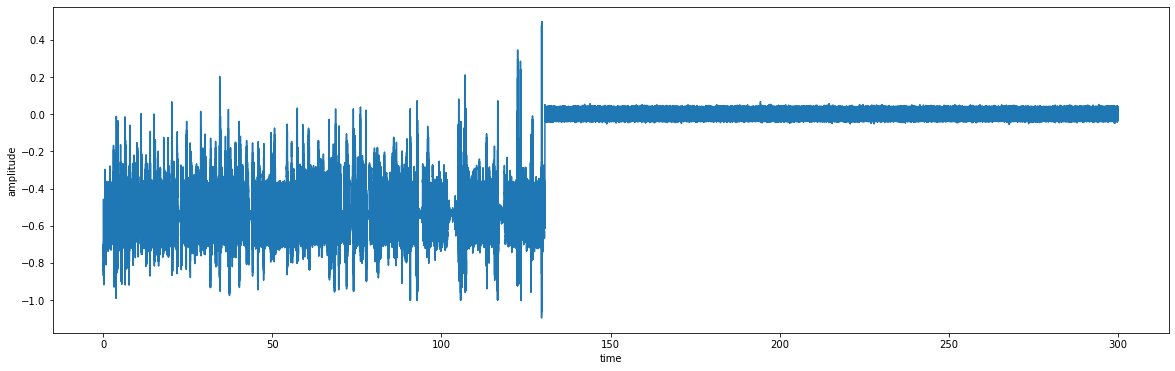

In [3]:
# function for plotting the wave in seconds instead of frames

def plot_wav(time_series,sample_rate):
    plt.figure(figsize=(20, 6))
    plt.xlabel('time')
    plt.ylabel('amplitude')
    print(0., len(time_series)/sample_rate, len(time_series))
    print(len(time_series))
    t = np.linspace(0., len(time_series)/sample_rate, len(time_series))
    print(len(t))
#     time = librosa.samples_to_time(time_series)
    plt.plot(t, time_series)
    return plt
    
plot_wav(x, sr)

In [4]:
def find_onset_frames(x, sr, backtrack=True):
    onset_frames = librosa.onset.onset_detect(
                        x,          # audio time series
                        sr=sr,      # sampling rate
                        wait=1,     #
                        pre_avg=1,
                        post_avg=1,
                        pre_max=1,
                        post_max=1,
                        backtrack=backtrack
                    )
#     print(onset_frames) # frame numbers of estimated onsets

    onset_times = librosa.frames_to_time(onset_frames)
    print(onset_times)
    return onset_times

onset_times = find_onset_frames(x, sr)

[  1.34675737   1.4860771    2.94893424   3.52943311   4.10993197
   4.99229025   5.08517007   6.26938776   7.24462585   7.45360544
   7.59292517   8.56816327   8.82358277   9.65950113   9.82204082
  10.07746032  10.82049887  11.05269841  12.72453515  13.7229932
  14.83755102  17.57750567  17.7168254   20.06204082  20.50321995
  22.19827664  22.9877551   24.31129252  25.82058957  25.9599093
  27.44598639  28.76952381  30.02340136  30.27882086  31.46303855
  31.85777778  32.57759637  33.01877551  33.43673469  34.04045351
  34.2029932   34.89959184  35.85160998  36.03736961  36.82684807
  36.9661678   37.08226757  40.12408163  40.47238095  41.7262585
  42.16743764  42.49251701  42.72471655  43.11945578  43.95537415
  44.35011338  44.55909297  45.48789116  45.88263039  47.06684807
  49.43528345  49.7139229   50.38730159  55.89043084  56.86566893
  57.00498866  57.1907483   58.83936508  58.90902494  59.09478458
  59.53596372  60.58086168  60.85950113  63.48335601  64.04063492
  66.61804989

cutoff reached
cutting at 131
0.0 131.0 2888550
2888550
2888550


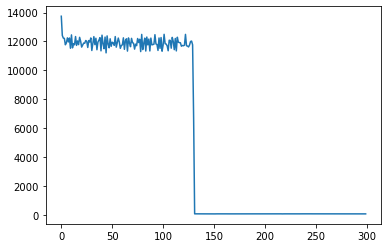

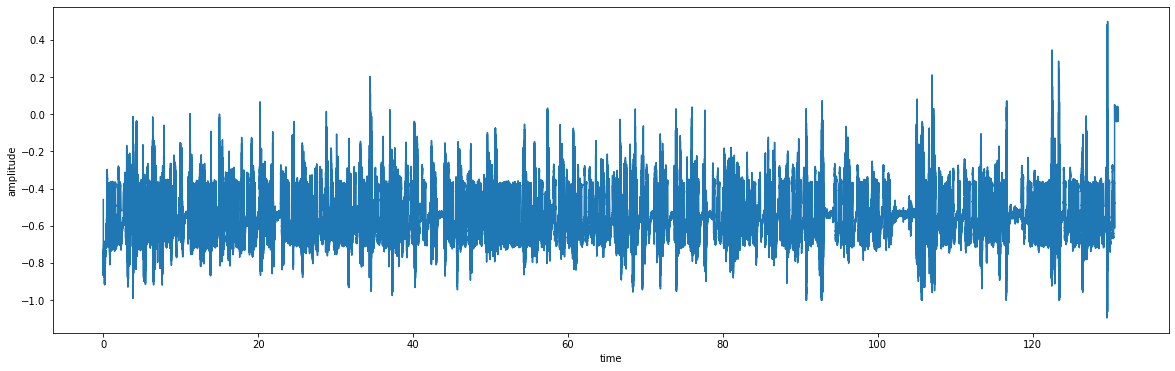

In [5]:
# STEP 1: using the last onset, we will cut out the noise at the end of the recording
def cut_recording(x, sr):
#     x = cut(x, onset_times[-1], sr)
    x = cut(x, cut_by_integration(x, width=sr), sr)
    plot_wav(x, sr)
    return x

def cut(x, endtime, sr):
    print("cutting at " + str(endtime))
    return x[:int(endtime+0.5)*sr]

def cut_by_integration(x, width=sr):
    # integrate in a sliding window area of interest, the magnitude gives us a value to judge where to cut
    length = len(x)
    seconds = int(length/sr)
    windows = range(0, length, sr)
    intx = [abs(sum(x[a: a+sr])) for a in windows]
#     print(intx)
    plt.figure()
    plt.plot(intx)
    for i in range(seconds-1, 0, -1):
#         print(intx[i])
        if intx[i] > 200: # cutoff
            print("cutoff reached")
            return i+1 if i+1 < seconds-1 else seconds-1
    
    return -1

# cut_at = cut_by_integration(x_left, width=sr)
# print("we should cut at {}".format(cut_at))
x = cut_recording(x, sr)

0.0 130.9901133786848 2888332
2888332
2888332
[  1.36997732   1.85759637   2.94893424   3.0185941    3.13469388
   3.52943311   3.92417234   4.10993197   4.29569161   5.08517007
   5.41024943   6.26938776   7.33750567   7.4768254    7.54648526
   7.80190476   8.54494331   9.63628118   9.82204082  10.07746032
  10.89015873  11.02947846  11.81895692  12.4923356   12.67809524
  13.69977324  13.88553288  14.83755102  14.97687075  15.27873016
  15.37160998  15.55736961  17.5078458   17.92580499  18.92426304
  20.06204082  20.20136054  20.36390023  20.50321995  20.57287982
  21.64099773  21.7106576   21.94285714  22.17505669  22.84843537
  23.03419501  23.33605442  24.07909297  24.28807256  24.4738322
  25.54195011  25.82058957  25.98312925  26.56362812  27.05124717
  27.30666667  27.72462585  28.11936508  28.67664399  28.76952381
  28.95528345  29.28036281  29.72154195  29.88408163  30.09306122
  31.4862585   31.57913832  31.85777778  32.39183673  32.57759637
  33.01877551  33.25097506  33.

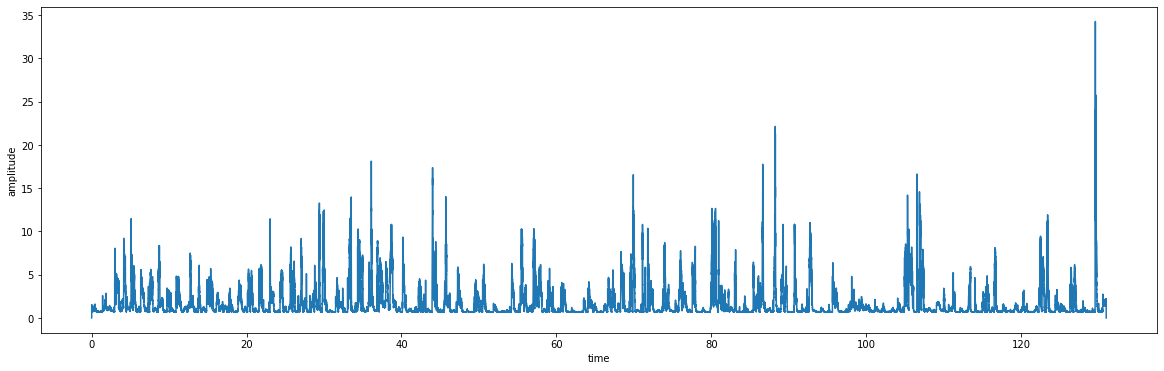

In [6]:
# find length in sliding window area of interest
def length_gen(a, sr, seconds=0.01):
    window_len = int(sr * seconds) # frames per window
    length = len(a)
    
    # generate first window
    i = 1
    result = 0
    value = a[0]
    prev_delta = (a[1]-a[0] > 0)
    while i < window_len:
#         print("a[{}] = {}".format(i, a[i]))
        if a[i] > a[i-1] and not prev_delta:
            # increasing and was decreasing before
            result += value - a[i-1]
            value = a[i-1]
            prev_delta = True
        elif a[i] < a[i-1] and prev_delta:
            # decreasing and was increasing before
            result += a[i-1] - value
            value = a[i-1]
            prev_delta = False
        else:
            # increasing / decreasing like normal
            pass
        i += 1
    yield result

    # generate each consecutive window in a fast linear way
    # window[i] = window generated starting from ith sample, width w
    #           = length_of_string([a[i], a[i+1], ..., a[i+w-1]])
    # window[i+1] = window[i] - abs(a[i+1]-a[i])  + abs(a[i+w-1]-a[i+w-2])
    while i < length-(window_len-1):
        result += -abs(a[i+1]-a[i]) + abs(a[i+window_len-1]-a[i+window_len-2])
        yield result
        i += 1
    
#     length = len(x)
#     seconds = 0.01
#     window_len = int((length/(sr * 0.01)))
# #     windows = np.arange(0, length - window_len, window_len*0.5)
#     windows = [int(a) for a in windows]
#     length_gen(x, sr, window_len)

a = x
res = [0]*int(0.005*sr) + [a for a in length_gen(a, sr)] + [0]*int(0.005*sr)
res = np.array(res)
# print(res[-10:])
plot_wav(res, sr)
res_onsets = librosa.onset.onset_detect(res, sr, backtrack = True)
res_times = librosa.frames_to_time(res_onsets, sr)
print(res_times)
# plot_xvis(res, START, DUR, res_times, sr)

-0.5383372
0.0 131.0 2888550
2888550
2888550


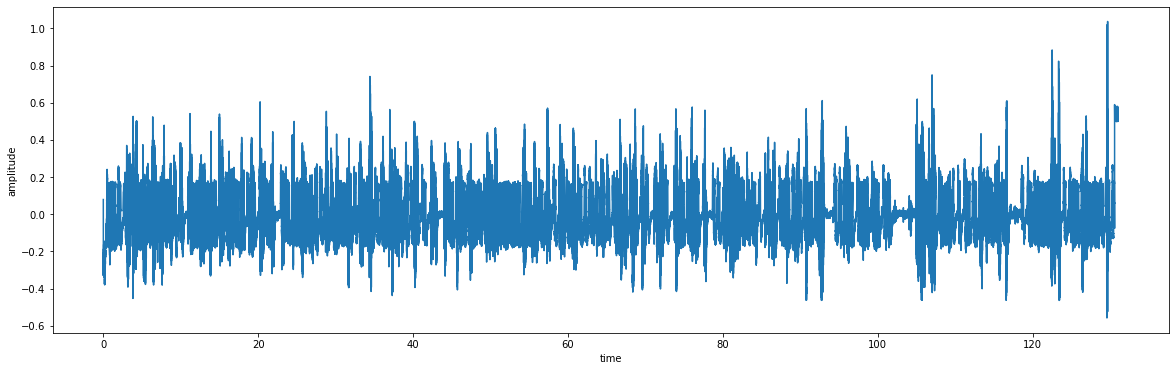

In [7]:
# STEP 2: Normalise the wave, by removing the DC Offset present in recording. 
# source: https://manual.audacityteam.org/man/dc_offset.html
# Audacity's DC removal method performs a calculation to make the average positive and negative sample values equal.

def dc_removal(x, sr):
    x_mean = np.mean(x)
    print(x_mean)
    x = [e - x_mean for e in x]
    plot_wav(x, sr)
    return x

x = dc_removal(x, sr)


0.0 4.0 88200
88200
88200


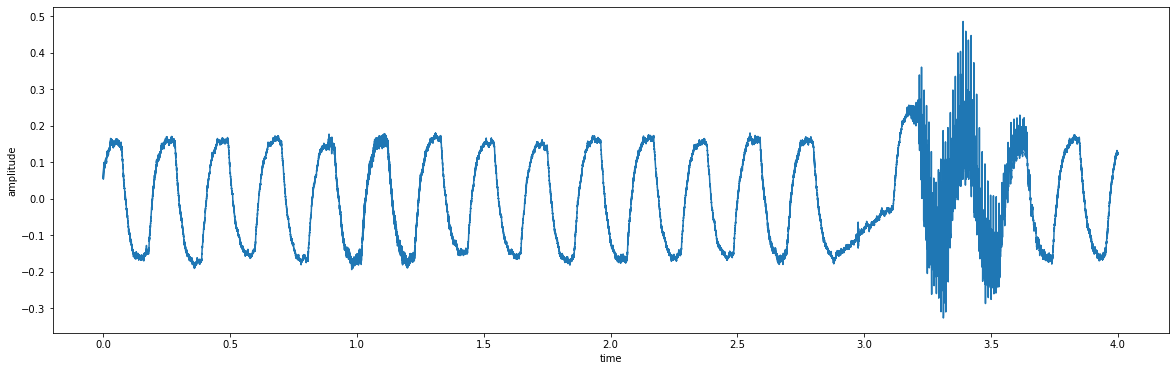

In [8]:
START = 51  #121#11 
DUR = 4     #2#5

def plot_xvis(x, start, dur, onset_times, sr):
    end = start + dur
    x_vis = x[start*sr:end*sr]
    plot_wav(x_vis, sr)
    for onset in onset_times:
        if onset < start:
            continue
        elif onset > end:
            break
        plt.axvline(x=onset-start)
        
plot_xvis(x, START, DUR, onset_times, sr)

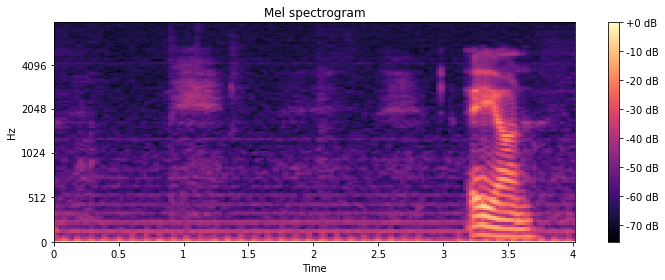

In [9]:
# Sine wave noise removal: spectogram

# D = np.abs(librosa.stft(x))**2
# S = librosa.feature.melspectrogram(S=D)

def get_S(x, sr):
    x = np.array(x)
    return librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128, fmax=8000)

def plot_ms(x, sr):
    import librosa.display
    S = get_S(x, sr)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    plt.show()
    
def plot_msvis(x, start, dur, sr):
    end = start + dur
    x_vis = x[start*sr:end*sr]
    plot_ms(x_vis, sr)
    
# plot_ms(x)
plot_msvis(x, START, DUR, sr)

20
[ 0.037224   -0.2199548  -0.16112052 ... -0.00069032  0.00764033
  0.00267946]
300
[-2.62774982e-03 -2.46485494e-01 -1.74353522e-01 ... -3.69619853e-03
  4.76901651e-03 -4.98514644e-05]
0.0 6.0 132300
132300
132300


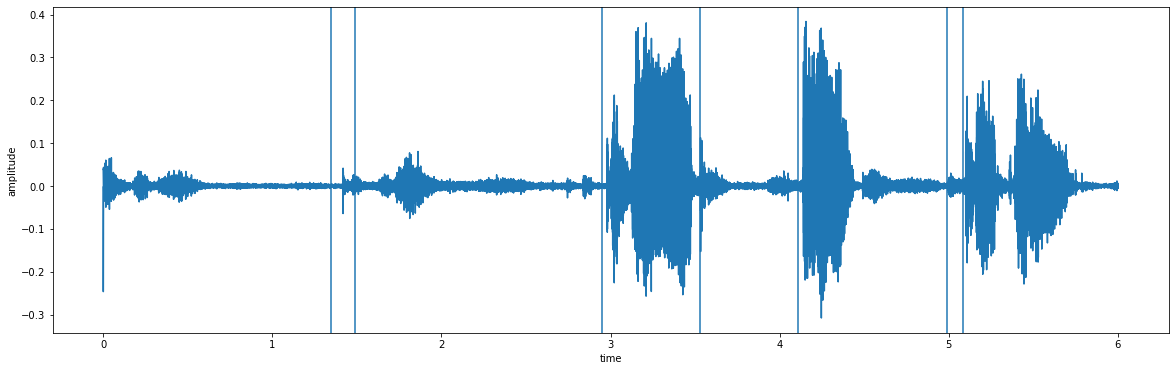

In [10]:

def high_pass_filter(x, sr, cutOff = 500):
    from scipy import signal

    #Creation of filter
    print(cutOff)
    # cutOff = 10 # Cutoff frequency
    nyq = 0.5 * sr
    N  = 5    # Filter order
    fc = cutOff / nyq # Cutoff frequency normal
    b, a = signal.butter(N, fc, btype='high') # high pass filter
    # b, a = signal.butter(N, fc)                 # low pass filter

    #Apply the filter
    tempf = signal.filtfilt(b, a, x)

    print(tempf)
    return tempf

def low_pass_filter(x, sr, cutOff = 14000):
    from scipy import signal

    #Creation of filter
    print(cutOff)
    # cutOff = 10 # Cutoff frequency
    nyq = 0.5 * sr
    N  = 5    # Filter order
    fc = cutOff / nyq # Cutoff frequency normal
    b, a = signal.butter(N, fc) # high pass filter
    # b, a = signal.butter(N, fc)                 # low pass filter

    #Apply the filter
    tempf = signal.filtfilt(b, a, x)

    print(tempf)
    return tempf

# tempf_left = high_pass_filter(x_left, sr)
# tempf_right = high_pass_filter(x_right, sr)
# plot_xvis(tempf_left, START, DUR, onset_times, sr)
# plot_xvis(tempf_right, START, DUR, onset_times, sr)
normal_t = high_pass_filter(x, sr, cutOff=20)
t = high_pass_filter(x, sr, cutOff=300)
plot_xvis(t, 0, 6, onset_times, sr)

# tempf = []
# start =4.0
# end = 20.0
# step = 0.5
# n = int(( end - start ) / step)
# for i in np.arange(start,end,step):
#     result = high_pass_filter(x_left, sr, cutOff = i)
#     tempf.append(result)
# #     plot_xvis(a, START, DUR, onset_times, sr)

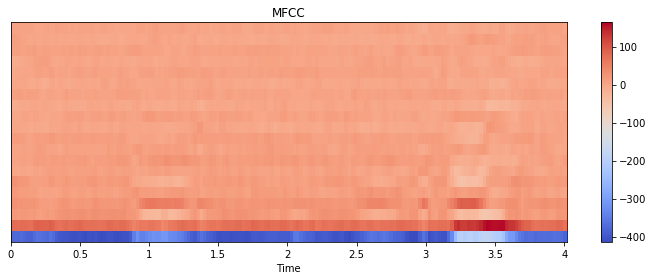

In [11]:
# fig, axs = plt.subplots(n)
# fig.set_figheight(20)
# fig.set_figwidth(6)
# fig.suptitle('Vertically stacked subplots')
# print("len(tempf) = {} == n = {} ?".format(len(tempf), n))
# for i in range(n):
#     axs[i].plot(range(DUR*sr), tempf[i][START*sr:(START+DUR)*sr])
mfcc = librosa.feature.mfcc(y=np.array(normal_t[START*sr:(START+DUR)*sr]), sr=sr)
plt.figure(figsize=(10,4))
librosa.display.specshow(mfcc, x_axis="time")
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

[-2.62774982e-03 -2.46485494e-01 -1.74353522e-01 ... -3.69619853e-03
  4.76901651e-03 -4.98514644e-05]


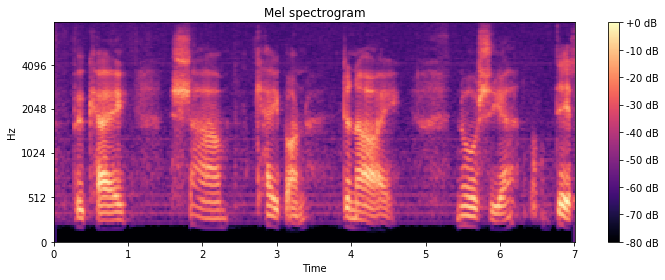

0.0 7.0 154350
154350
154350
shape of s: (128, 5642)
sums shape: (5642,) = [37.376507   16.17877     7.9702253  ...  0.46888587  0.5044804
  0.47153732]
0.0 7.0 301
301
301
[1. 0. 0. ... 0. 0. 0.]
0.0 7.0 301
301
301
5642
30.74188
before: len =  130
now, sounds:  93
onset_detects:  274
0.0 7.0 301
301
301
(1, 5642)
[0.66461897 0.22900887 0.13561964 ... 0.00463763 0.00507792 0.00481982]
0.0 7.0 301
301
301
0.0 7.0 301
301
301
0.0 7.0 301
301
301


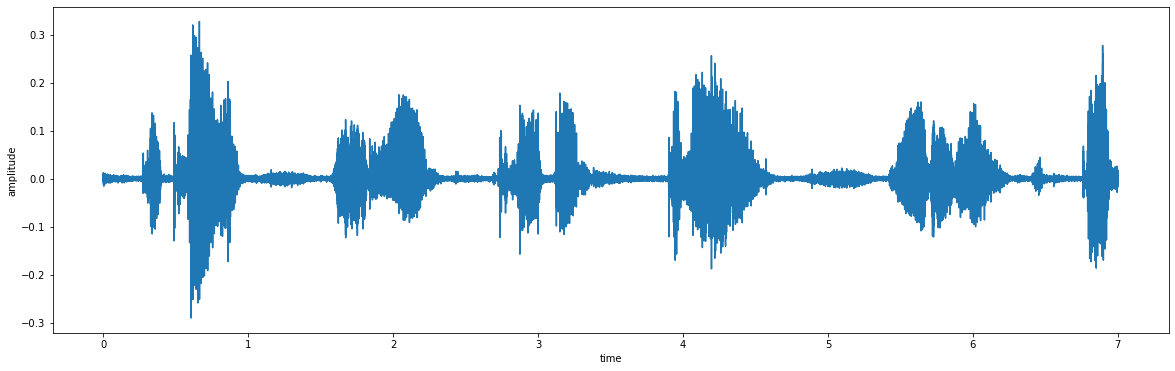

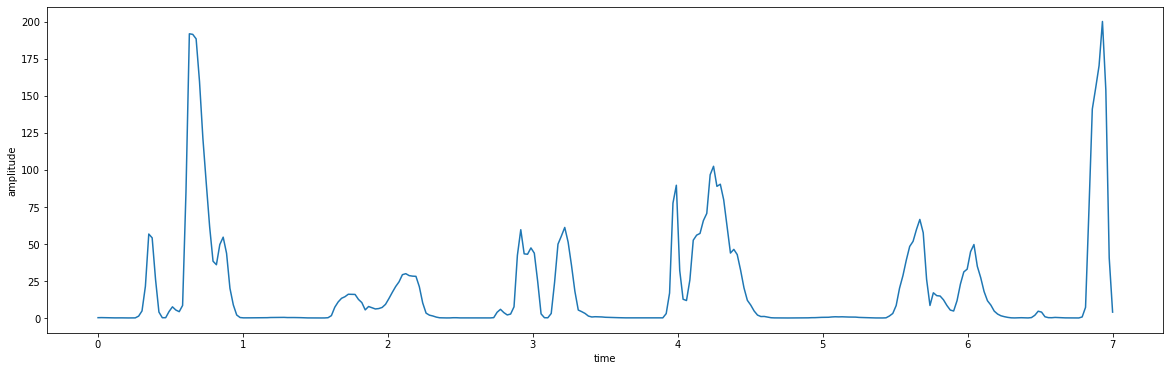

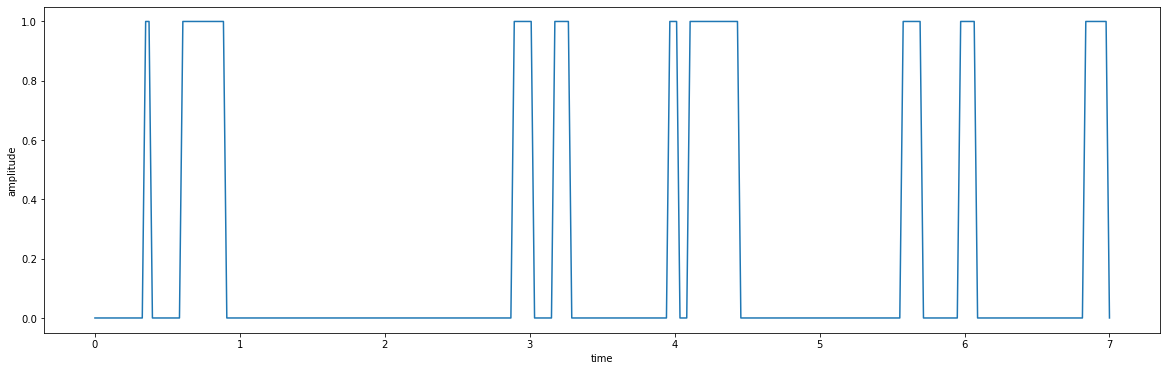

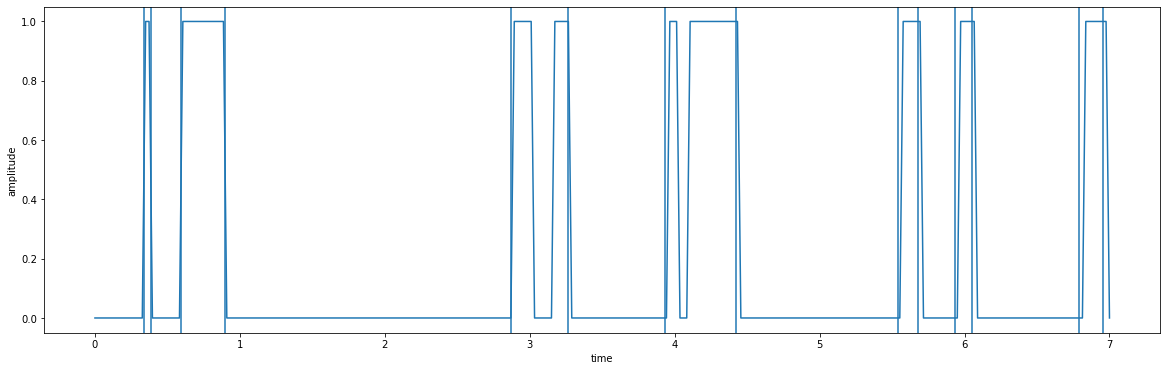

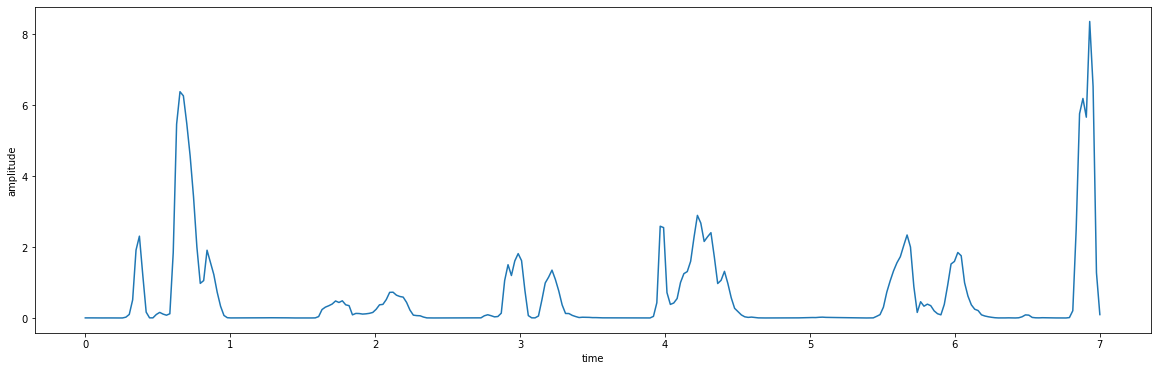

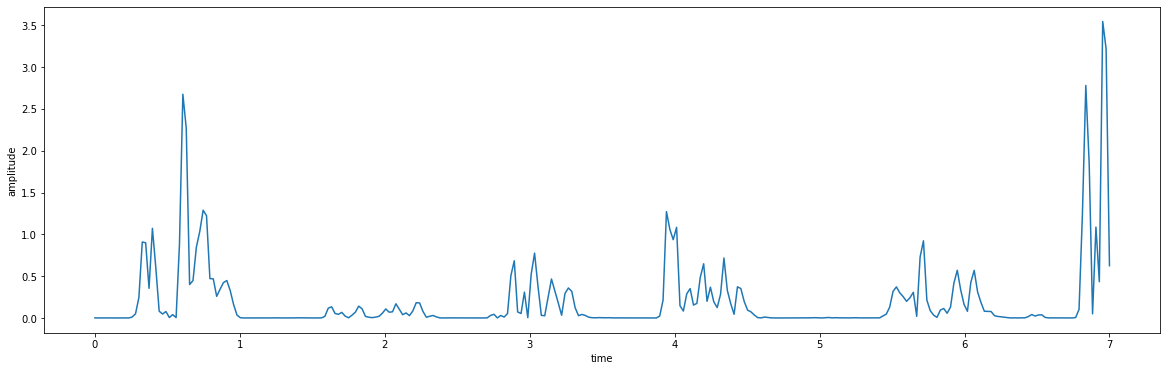

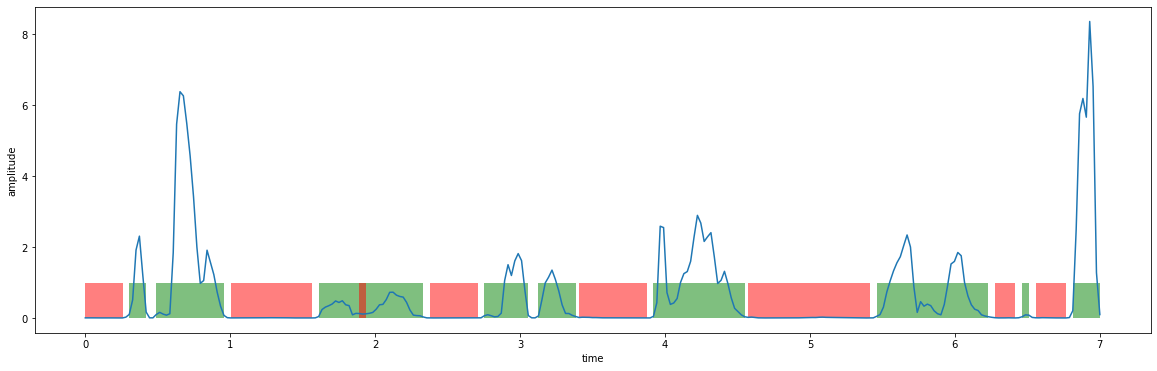

In [12]:
# plot_ms(t,sr)
# plot_msvis(t, START, DUR, sr)
print(t)
s = get_S(t, sr)
nstart = 7
ndur = 7
plot_msvis(t, nstart, ndur, sr)

# mfcc = librosa.feature.mfcc(y=np.array(normal_t), sr=sr)
# mfccvis = librosa.feature.mfcc(y=np.array(normal_t[nstart*sr:(nstart+ndur)*sr]), sr=sr)
# plt.figure(figsize=(10,4))
# librosa.display.specshow(mfccvis, x_axis="time")
# plt.colorbar()
# plt.title('MFCC')
# plt.tight_layout()
# plt.show()

# print(np.shape(mfcc[0]))
# plot_xvis(mfcc[0], nstart, ndur, [], int(sr/512))

plot_xvis(t, nstart, ndur, [], sr)


# remove the lower frequencies from the mel spectrogram
print("shape of s:", np.shape(s))
sums = np.sum(s, axis=0)
print("sums shape:" ,np.shape(sums), "=", sums)
plot_xvis(sums, nstart, ndur, [], int(sr/512))

threshold = np.heaviside(sums - np.mean(sums),1)
# threshold = np.heaviside(sums - 5,1)
print(threshold)

plot_xvis(threshold, nstart, ndur, [], int(sr/512))
print(len(sums))
print(np.mean(sums))

# calculate each silence based on threshold
ntimes1 = []
ntimes2 = []
i = 0
silence = (threshold[i] == 1.0)
sounds = []
curr_sound = []
for i in range(1, len(threshold)):
    if threshold[i] == 1.0 and threshold[i-1] < 1.0:
        #start of sound
        if not curr_sound:
            ntimes1.append(i*512/sr)
            curr_sound.append(i*512/sr)
    elif threshold[i] == 0.0 and threshold[i-1] > 0.0:
        #end of sound
        if curr_sound:
            ntimes2.append(i*512/sr)
            curr_sound.append(i*512/sr)
            sounds.append(curr_sound)
            curr_sound = []
# apply minimum length of 0.1 seconds for silence
# for i in range(1, len(ntimes)):

print("before: len = ", len(sounds))
i = 1
min_len = 0.15
while i < len(sounds):
    if sounds[i][0]-sounds[i-1][1] < min_len:
        # this silence is too short
        sounds[i-1][1] = sounds[i][1]
        sounds.pop(i)
        i -= 1
    i += 1
    
print("now, sounds: ", len(sounds))
            
nonsets = librosa.onset.onset_detect(int(sr/512), onset_envelope = threshold, backtrack = True)
ntimes = librosa.frames_to_time(res_onsets, sr)
print("onset_detects: ",len(ntimes))

ssounds = np.array(sounds)
ssounds = ssounds.flatten()

plot_xvis(threshold, nstart, ndur, ssounds, int(sr/512))

# RMS
rms = librosa.feature.rms(S = s)
print(np.shape(rms))
print(rms[0])
p = plot_xvis(rms[0], nstart, ndur, [], int(sr/512))

rms_vis = rms[0][nstart*int(sr/512):(nstart+ndur)*int(sr/512)]
# take the gradient of the RMS
drms = np.gradient(rms[0])
# take the magnitude only
mdrms = np.absolute(drms)
plot_xvis(mdrms, nstart, ndur, [], int(sr/512))
mdrms_vis = mdrms[nstart*int(sr/512):(nstart+ndur)*int(sr/512)]

plt.figure(figsize=(20, 6))
plt.xlabel('time')
plt.ylabel('amplitude')
print(0., len(rms_vis)/int(sr/512), len(rms_vis))
print(len(rms_vis))
tees = np.linspace(0., len(rms_vis)/int(sr/512), len(rms_vis))
print(len(tees))
#     time = librosa.samples_to_time(time_series)
plt.plot(tees, rms_vis)
plt.fill_between(tees, 0, 1, where=rms_vis > 0.025,facecolor='green', alpha=0.5)
plt.fill_between(tees, 0, 1, where=mdrms_vis < 0.012,facecolor='red', alpha=0.5)


# tees = np.linspace(0., len(rms_vis)/int(sr/512), len(rms_vis))
# print(len(tees))
# #     time = librosa.samples_to_time(time_series)
# plt.plot(tees, drms[nstart*int(sr/512):(nstart+ndur)*int(sr/512)])
# plt.fill_between(tees, 0, 1, where=drms > 0.025,facecolor='green', alpha=0.5)

0.0 15.0 645
645
645
0.0 15.0 645
645
645
0.0 15.0 645
645
645
0.0 15.0 645
645
645
0.0 15.0 645
645
645
0.0 15.0 645
645
645
0.0 15.0 645
645
645
0.0 15.0 645
645
645
0.0 11.209302325581396 482
482
482


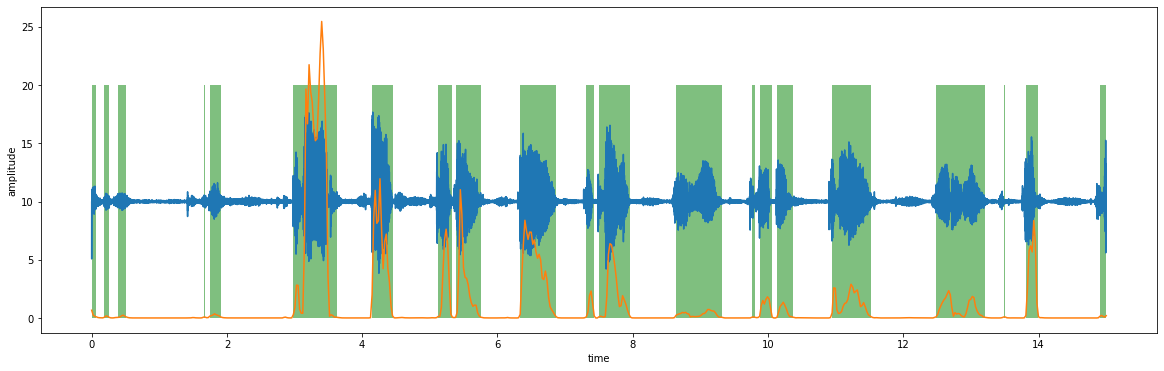

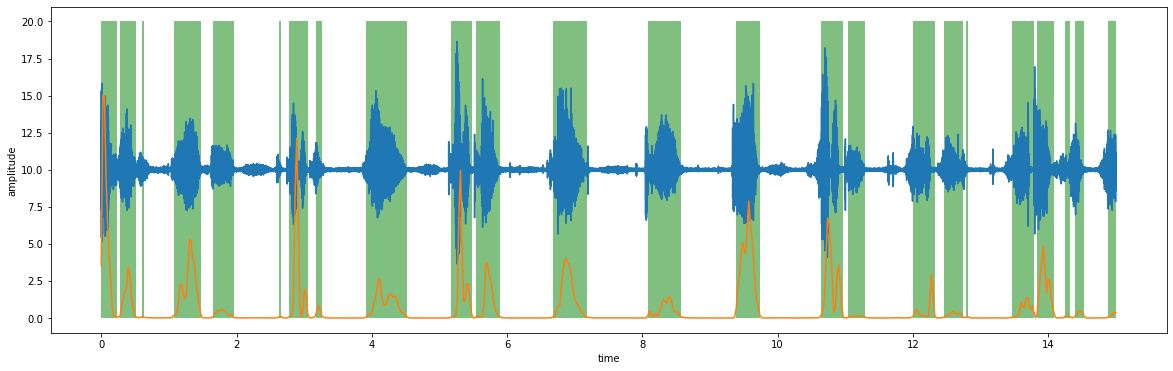

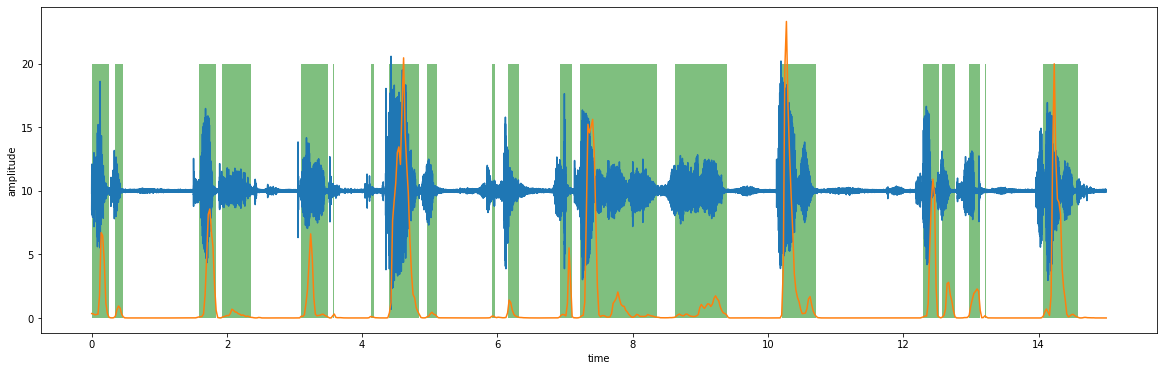

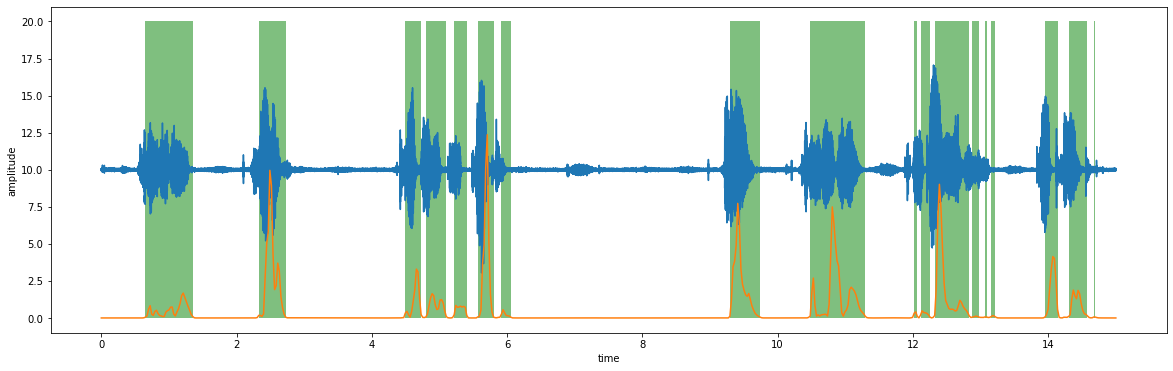

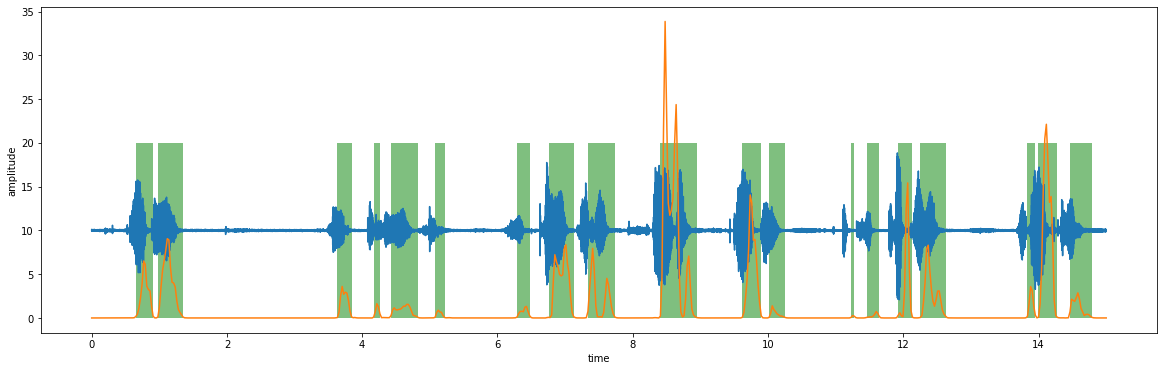

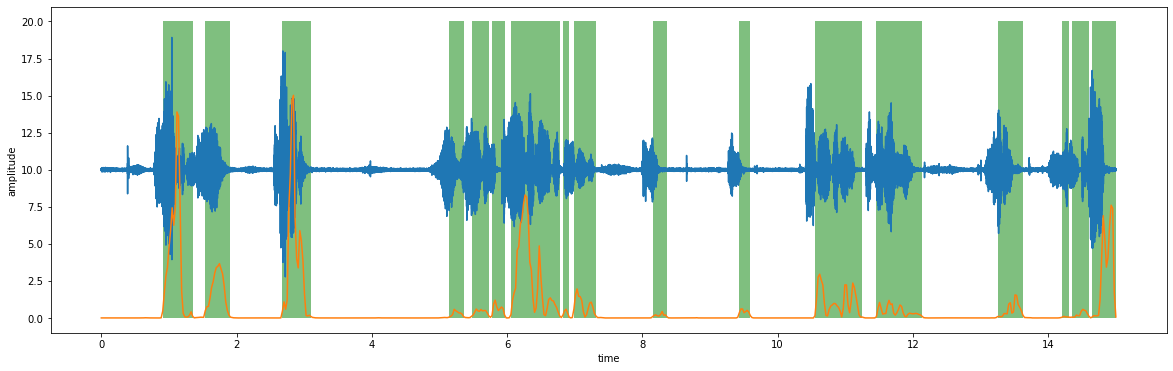

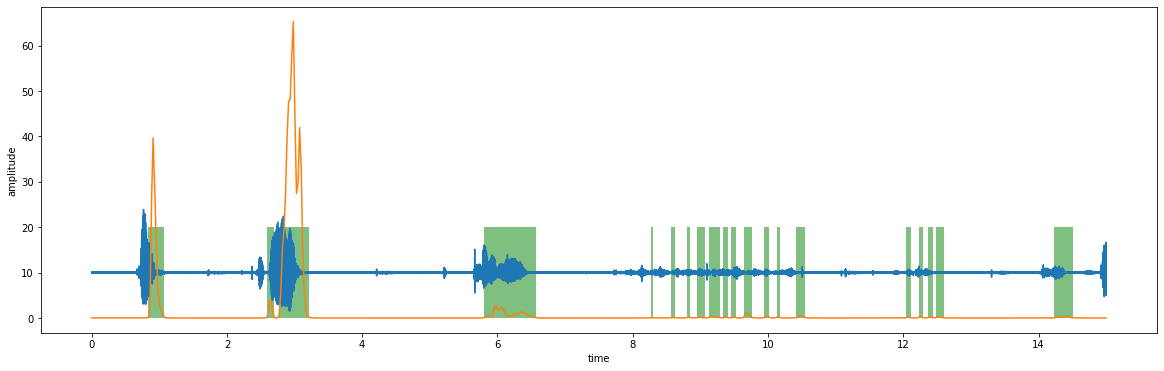

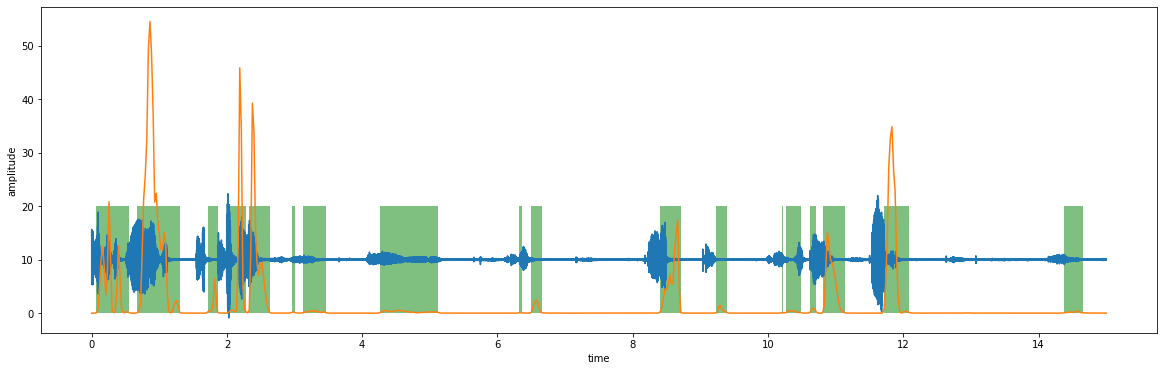

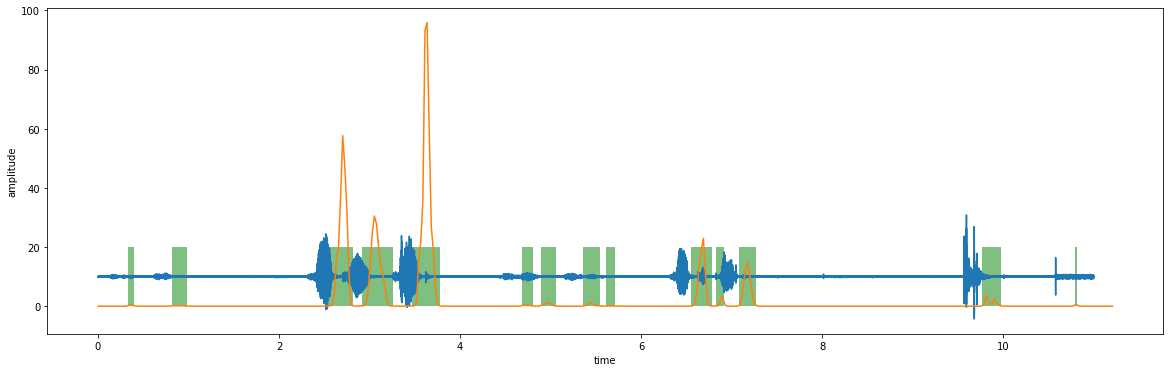

In [13]:
# Consistency check for above method
nstart = 0
ndur = 15
def test_rms(t, sr, nstart=0, ndur=5):
#     plot_xvis(t, nstart, ndur, [], sr)
    t_vis = t[nstart*sr:(nstart+ndur)*sr]
    t_vis = [20*a + 10 for a in t_vis]
    plt.figure(figsize=(20, 6))
    plt.xlabel('time')
    plt.ylabel('amplitude')
    teess = np.linspace(0., len(t_vis)/sr, len(t_vis))
    plt.plot(teess, t_vis)
    
    s = get_S(t, sr)
    # RMS
    rms = librosa.feature.rms(S = s)
    # p = plot_xvis(rms[0], nstart, ndur, [], int(sr/512))

    rms_vis = rms[0][nstart*int(sr/512):(nstart+ndur)*int(sr/512)]
    # plt.figure(figsize=(20, 6))
    # plt.xlabel('time')
    # plt.ylabel('amplitude')
    print(0., len(rms_vis)/int(sr/512), len(rms_vis))
    print(len(rms_vis))
    tees = np.linspace(0., len(rms_vis)/int(sr/512), len(rms_vis))
    print(len(tees))
    #     time = librosa.samples_to_time(time_series)
    plt.plot(tees, rms_vis)
    plt.fill_between(tees, 0, 20, where=rms_vis > 0.05,facecolor='green', alpha=0.5)
    plt.show

for i in range(0, int(len(t)/sr), ndur):
    test_rms(t, sr, nstart=i, ndur=ndur)


In [14]:
# debugging:
print("length of x is: " + str(len(x)))
print("that's equal to " + str(len(x)/sr) + " seconds")

length of x is: 2888550
that's equal to 131.0 seconds


cutting at 130.6122448979592
0.0 131.0 2888550
2888550
2888550


<module 'matplotlib.pyplot' from '/home/justin/anaconda3/envs/tor/lib/python3.7/site-packages/matplotlib/pyplot.py'>

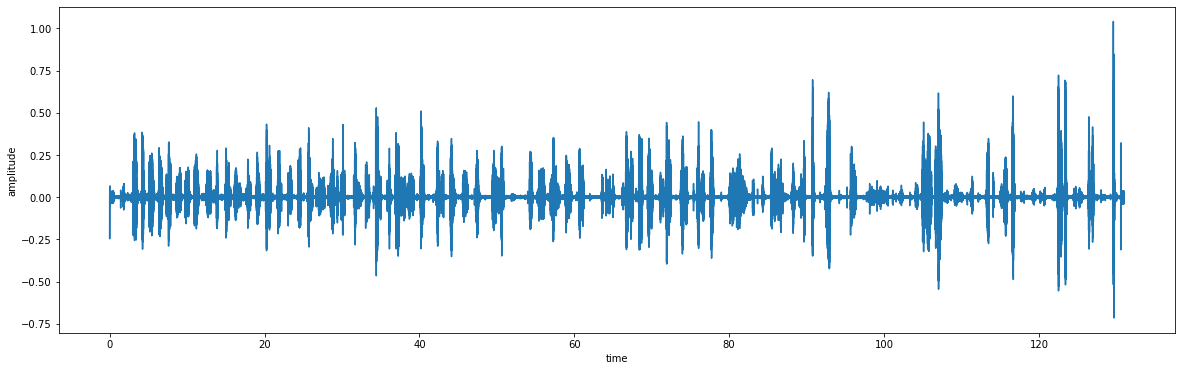

In [18]:
# Cut the recording and apply the normalisation
# Using the last sound recognised, we will cut out the noise at the end of the recording
def cut_recording_sounds(x, sr, sounds):
    # x = cut(x, onset_times[-1], sr)
    x = cut(x, sounds[-1][1], sr)
    # plot_wav(x, sr)
    return x

t_cut = cut_recording_sounds(t, sr, sounds)
plot_wav(t_cut, sr)

In [ ]:
# VAD
import webrtcvad
vad = webrtcvad.Vad(1) # aggressiveness level

window_duration = 0.03 # in seconds
samples_per_window = int(window_duration * sr + 0.5) # to round up
bytes_per_sample = 2

import struct
print(len(x))
# rip = [a for a in x if a >= 1.0]
# print(rip)
m = max(x)
raw_x = [int(sample*32767/m) for sample in x]
s = struct.Struct("%dh" % len(raw_x))
raw_x = s.pack(*raw_x)

segments = []
# onsets = []


for start in np.arange(0, len(x), samples_per_window):
    stop = min(start + samples_per_window, len(x))
    
    is_speech = vad.is_speech(raw_x[start*bytes_per_sample: stop*bytes_per_sample], sample_rate = sr)
#     output.append(int(is_speech))
    
    
    if segments and segments[-1]["is_speech"] == is_speech:
        # extend the previous reading
        segments[-1]["stop"] = stop
    else:
        segments.append(dict(
            start = start,
            stop = stop, 
            is_speech = is_speech
            )
        )
#         onsets.append(start/(sr*0.03))

print(segments)

# onsets = librosa.frames_to_time(onsets)
# print(onsets)
START = 0
DUR = 1
plot_xvis(x, START, DUR, [], sr) #onsets)
for segment in segments:
    if segment["is_speech"] == True:
        xstart = segment["start"] * window_duration / sr 
        xstop =  segment["stop"] * window_duration / sr 
        print("start: {}, stop: {}".format(xstart, xstop))
        if xstart < START:
            continue
        elif xstop > START + DUR:
            break
        else:
            plt.axvspan(xstart, xstop, alpha=0.5, color='red')
        